In [2]:
 !git clone https://gitlab.com/lambda-hse/gans_coursera_public
%cd gans_coursera_public
from grading import Grader
parts = ['jVFC7', 'Rv1wq', 'q2JU7']
grader = Grader('6-2EkUahSs6zHJ-uAepHzw', parts)

/content/gans_coursera_public


In [3]:
COURSERA_EMAIL, COURSERA_TOKEN = ???, ??? # Paste your email and submission token from assignment page here

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Section 2. Distances between distributions

In [5]:
import torch
!pip install pyro-ppl
import pyro
from pyro import distributions as distrs
import numpy.testing as np_testing
import seaborn as sns
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7, 8.27)})

## Space worms teeth distribution

Suppose that we're space-scientists visiting a distant, new planet and we've discovered a species of biting worms that we'd like to study. We've found that these worms have 10 teeth, but because of all the chomping away, many of them end up missing teeth. After collecting many samples we have come to this empirical probability distribution of the number of teeth in each worm:
 
![Space worms](https://images.squarespace-cdn.com/content/v1/54e50c15e4b058fc6806d068/1494401025139-ODE7CP2043TS1CO9MQSN/ke17ZwdGBToddI8pDm48kLuT3KTpMRZ2imBrzIWD9_5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVG-_BClLJADi5Tjms1vR9XfE3ardhQXleMJTem2-1ZqRideLm3HbGNLisCtv4-dzhc/biting-worms.jpg?format=1000w)

Picture and idea credits: https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

In [6]:
# ensure the probability adds up to 1
true_data = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
n = true_data.shape[0]
index = torch.arange(n).float()

In [7]:
np_testing.assert_almost_equal(true_data.sum().item(), 1., err_msg='Your probabilities do not sum up to 1!')

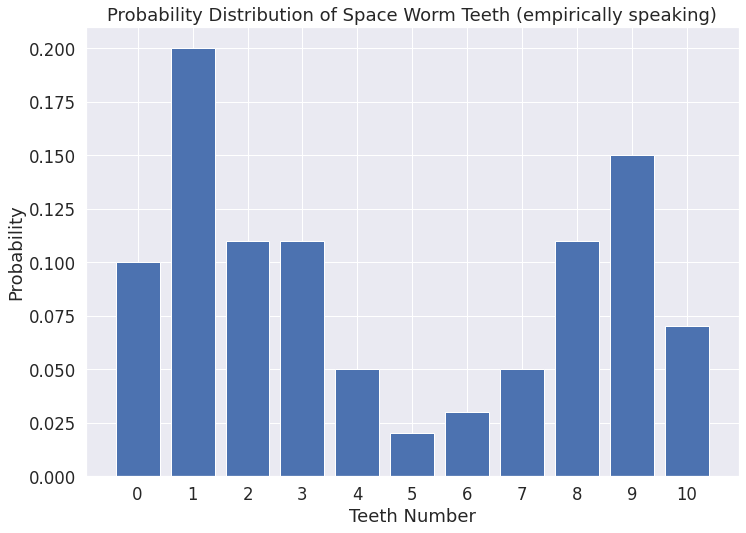

In [8]:
plt.figure()
plt.bar(index, true_data)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth (empirically speaking)')
plt.ylabel('Probability')
plt.xticks(index)
plt.show()

## Hypothesis about the data

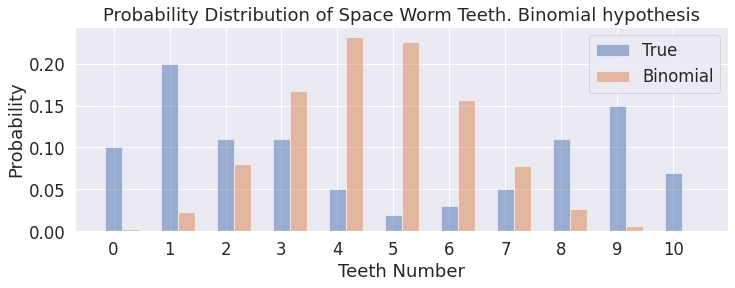

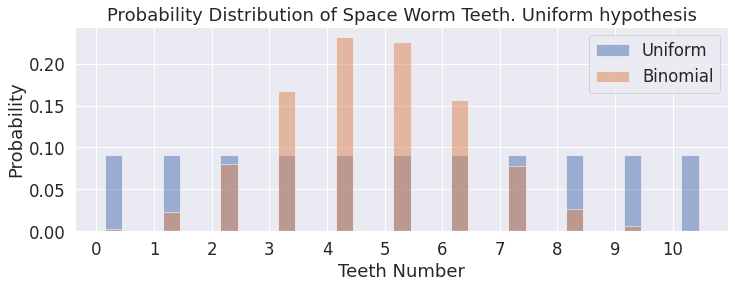

In [9]:
# uniform hypothesis samples
uniform_data = torch.full((n, ), 1.0 / n)

# binomial hypothesis samples
p = true_data.dot(index) / n
binomial_dist = distrs.Binomial(total_count=n, probs=p)
binom_data = binomial_dist.log_prob(index).exp()
width = 0.3

# plt.figure()
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index, true_data, width=width, label='True', alpha=0.5)
# plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Binomial hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()


plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

## Total variation distance
$$TVD(P||Q)=\sup_{x\in\Omega}|p(x)-q(x)|$$

In [10]:
def compute_tv_distance(p_probs: torch.Tensor, q_probs: torch.Tensor):
    ??? # YOUR CODE HERE

In [11]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()

print('TVD(True||Uniform): ', compute_tv_distance(true_data, uniform_data))
print('TVD(Uniform||True): ', compute_tv_distance(uniform_data, true_data))
print('TVD(True||Binomial): ', compute_tv_distance(true_data, binom_data))
print('TVD(Binomial||True): ', compute_tv_distance(binom_data, true_data))

TVD(True||Uniform):  tensor(0.1091)
TVD(Uniform||True):  tensor(0.1091)
TVD(True||Binomial):  tensor(0.2058)
TVD(Binomial||True):  tensor(0.2058)


In [25]:
## GRADED PART, DO NOT CHANGE! 
grader.set_answer(parts[0], [
                             compute_tv_distance(true_data, uniform_data).item(),
                             compute_tv_distance(uniform_data, true_data).item(),
                             compute_tv_distance(true_data, binom_data).item(),
                             compute_tv_distance(binom_data, true_data).item()
])

## KL divergence
$$KL ( P||Q ) = \int_{\mathbb{R}^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) dx$$

In [13]:
# Implement KL divergence below
def compute_kl_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    """"
    KL (P || Q) = \int_{R^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) = 
                = \sum_i p_i log(p_i / q_i)
    
    Note:
        1. The output -- kl_div -- should be one number that is equal to KL (P || Q)
        2. Do not forget to clamp your probabilities to avoid log(0) and (x / 0) problems!
    """
    EPS = 1e-7
    ???  # YOUR CODE HERE
    kl_div = ???  # YOUR CODE HERE
    return kl_div

In [14]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('KL(True||Uniform): ', compute_kl_divergence(true_data, uniform_data))
print('KL(Uniform||True): ', compute_kl_divergence(uniform_data, true_data))
print('KL(True||Binomial): ', compute_kl_divergence(true_data, binom_data))
print('KL(Binomial||True): ', compute_kl_divergence(binom_data, true_data))

KL(True||Uniform):  tensor(0.1636)
KL(Uniform||True):  tensor(0.1930)
KL(True||Binomial):  tensor(1.5118)
KL(Binomial||True):  tensor(1.1198)


In [26]:
## GRADED PART, DO NOT CHANGE! 
grader.set_answer(parts[1], [
                             compute_kl_divergence(true_data, uniform_data).item(),
                             compute_kl_divergence(uniform_data, true_data).item(),
                             compute_kl_divergence(true_data, binom_data).item(),
                             compute_kl_divergence(binom_data, true_data).item()
])

## Jensen–Shannon divergence
$$JS ( P||Q ) = \frac{KL ( P||Q ) + KL ( Q||P )}{2}$$

In [16]:
# Implement JS divergence below
def compute_js_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    js_div = ???  # YOUR CODE HERE
    return js_div

In [17]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('JS(True||Uniform): ', compute_js_divergence(true_data, uniform_data))
print('JS(Uniform||True): ', compute_js_divergence(uniform_data, true_data))
print('JS(True||Binomial): ', compute_js_divergence(true_data, binom_data))
print('JS(Binomial||True): ', compute_js_divergence(binom_data, true_data))

JS(True||Uniform):  tensor(0.1783)
JS(Uniform||True):  tensor(0.1783)
JS(True||Binomial):  tensor(1.3158)
JS(Binomial||True):  tensor(1.3158)


In [27]:
## GRADED PART, DO NOT CHANGE! 
grader.set_answer(parts[2], [
                             compute_js_divergence(true_data, uniform_data).item(),
                             compute_js_divergence(uniform_data, true_data).item(),
                             compute_js_divergence(true_data, binom_data).item(),
                             compute_js_divergence(binom_data, true_data).item()
])

In [30]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
